## CLASSIFICATION

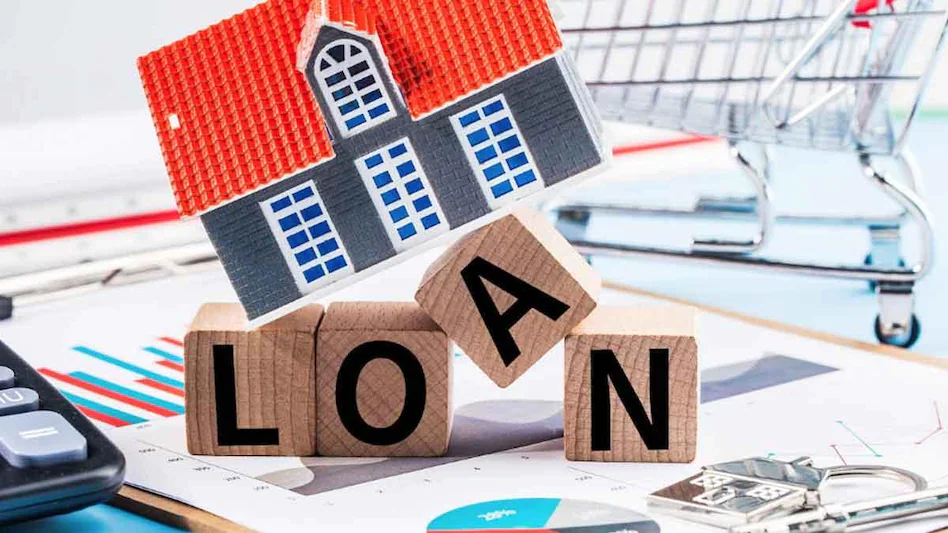

### DATASET DESCRIPTION
#### details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem identifying the customer segments eligible for loan amounts to target these customers specifically. Here they have provided a partial data set.

### IMPORTING LIABRARIES

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm  import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import klib as k
from mpl_toolkits.mplot3d import Axes3D
import os
import plotly.express as px
import plotly.io as pio
import itertools
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [57]:
data=pd.read_csv("loan_sanction_train.csv")


### EDA

In [58]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [59]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [60]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [40]:
k.clean_column_names(data)

,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0
7,1.0,1.0,3.0,0.0,0.0,3036.0,2504.0,158.0,360.0,0.0,1.0,0.0
8,1.0,1.0,2.0,0.0,0.0,4006.0,1526.0,168.0,360.0,1.0,2.0,1.0
10,1.0,1.0,2.0,0.0,0.0,3200.0,700.0,70.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1.0,1.0,0.0,0.0,0.0,3232.0,1950.0,108.0,360.0,1.0,0.0,1.0
609,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.0,360.0,1.0,2.0,1.0


<AxesSubplot:xlabel='loan_status', ylabel='count'>

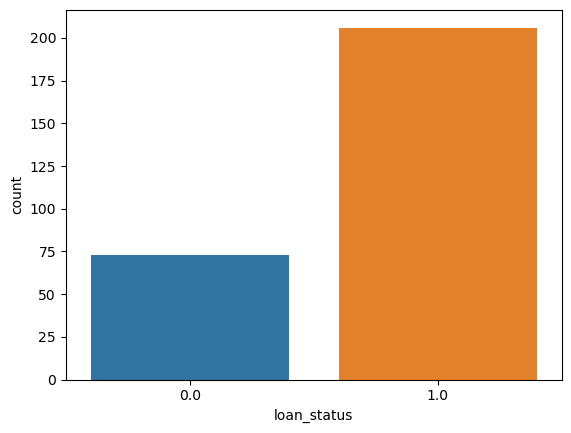

In [42]:
sns.countplot(x="loan_status", data=data)

<AxesSubplot:xlabel='self_employed', ylabel='count'>

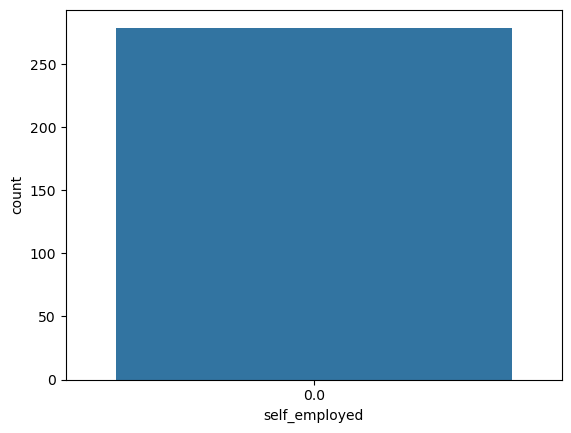

In [44]:
sns.countplot(x="self_employed", data=data)

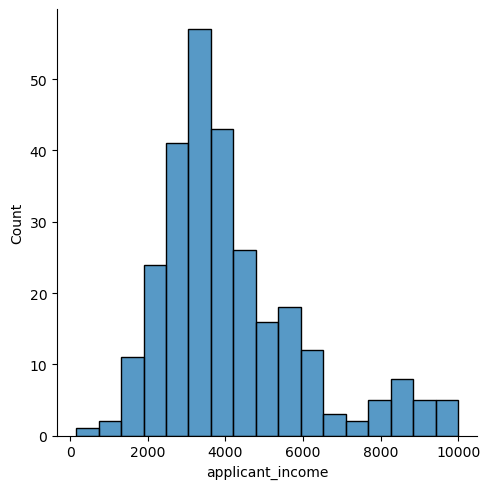

In [49]:
sns.displot(x="applicant_income", data=data)

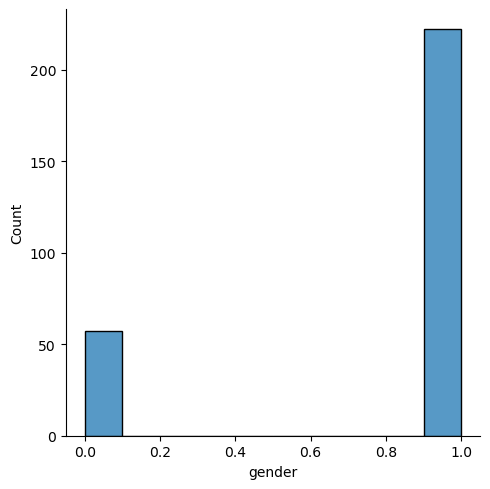

In [50]:
sns.displot(x="gender", data=data)

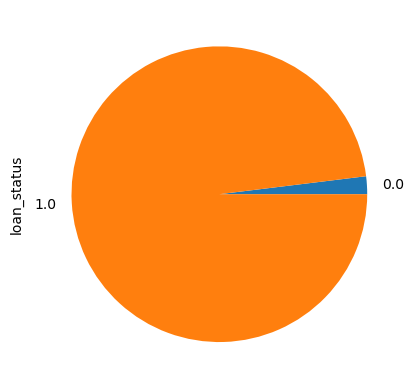

In [54]:
cut_price = data.groupby(['credit_history'])['loan_status'].sum()
cut_price.plot.pie();

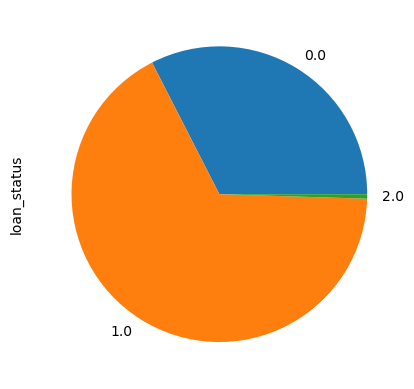

In [53]:
cut_price = data.groupby(['married'])['loan_status'].sum()
cut_price.plot.pie();

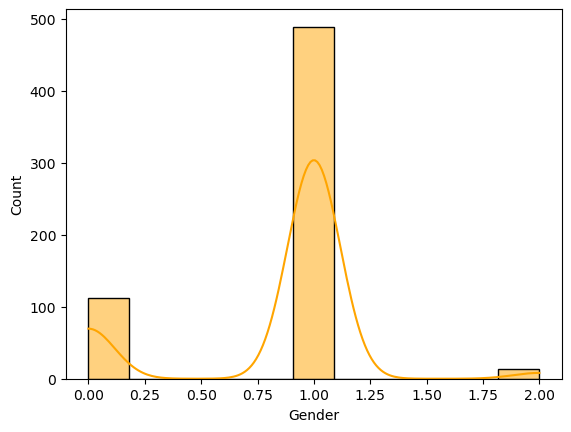

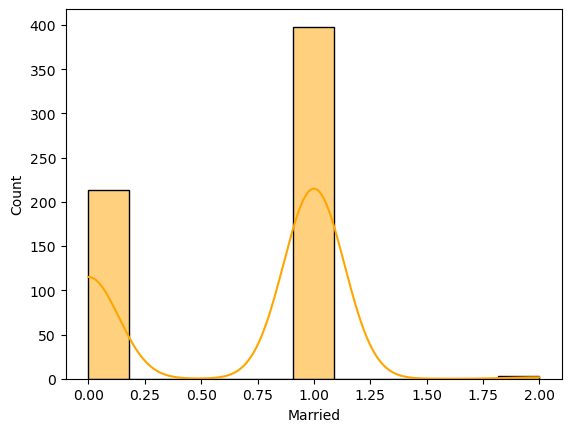

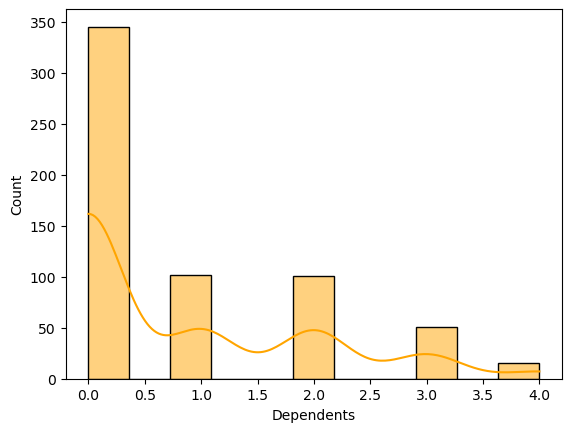

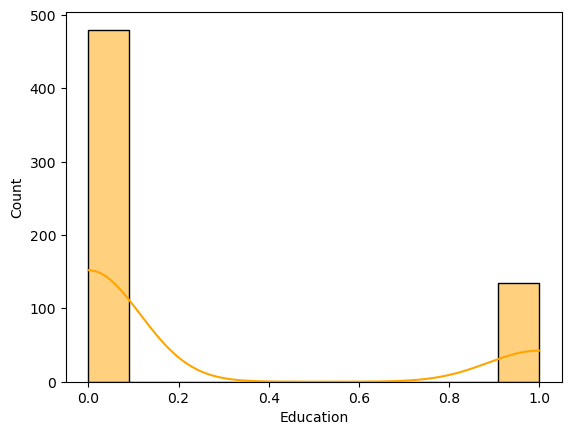

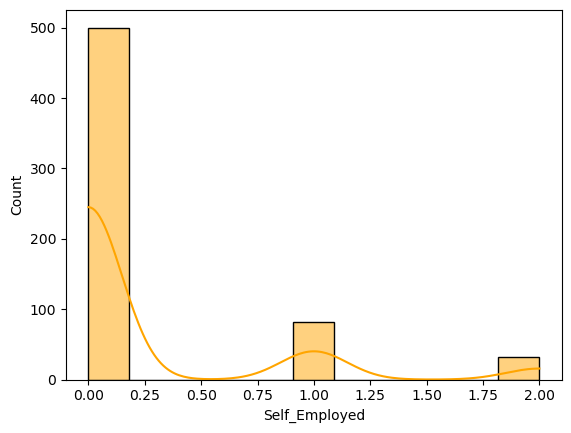

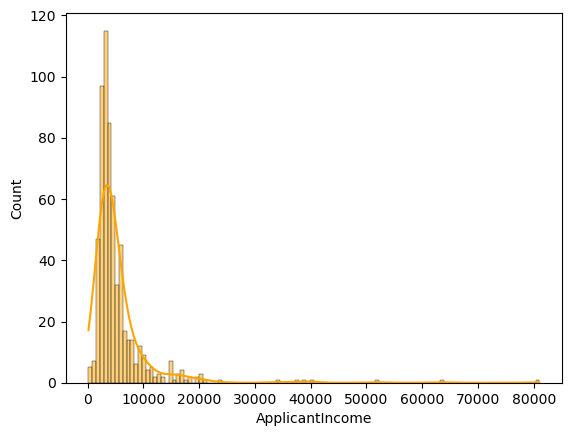

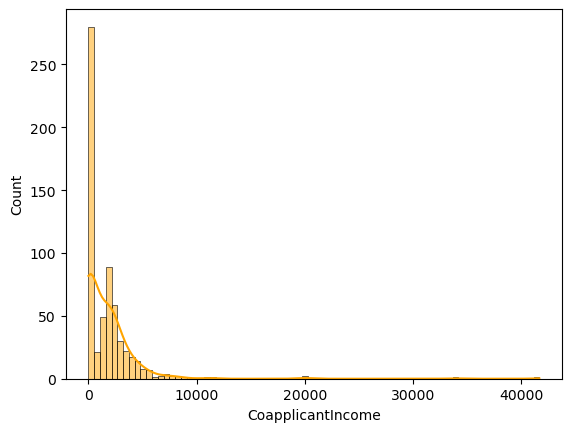

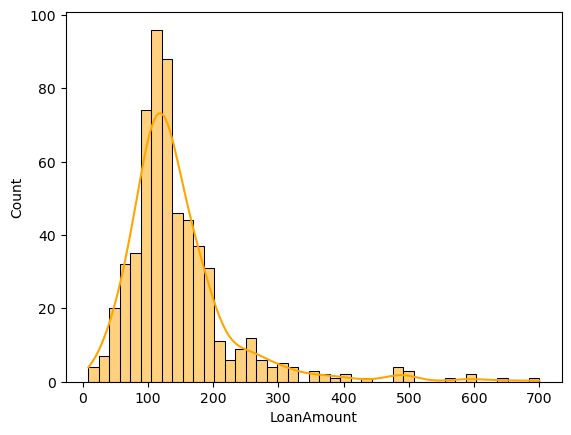

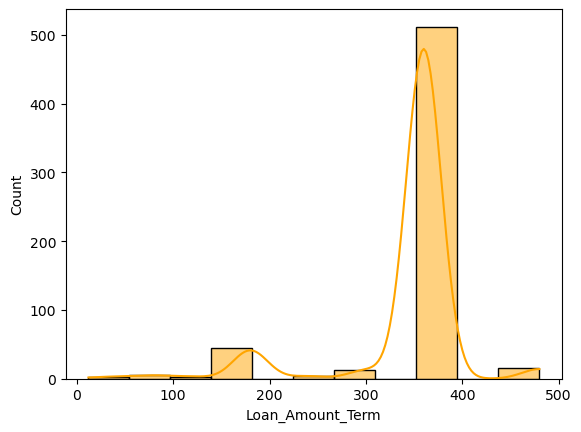

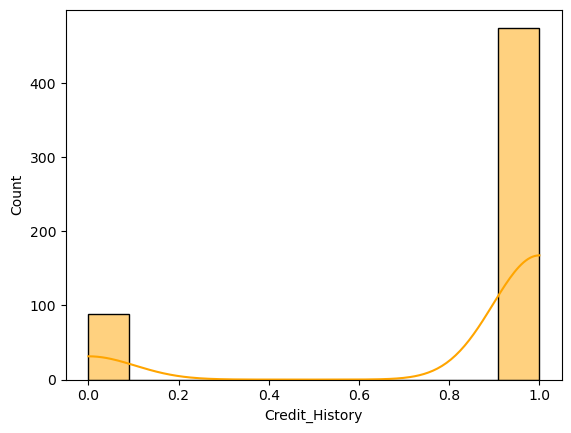

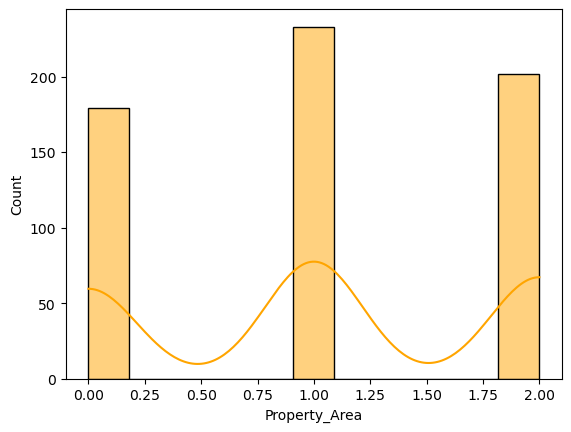

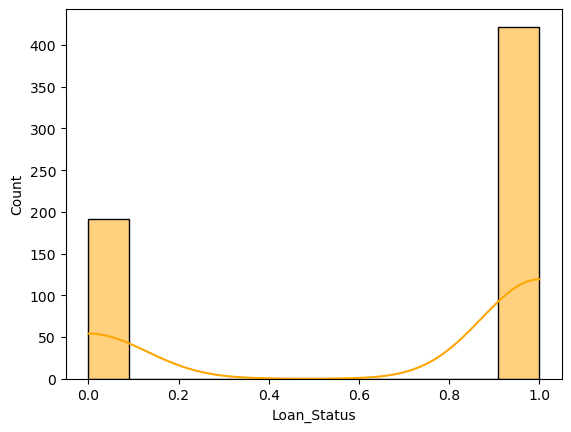

In [7]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.histplot(data, x=data[column], kde=True, color="orange")
        plt.show()

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

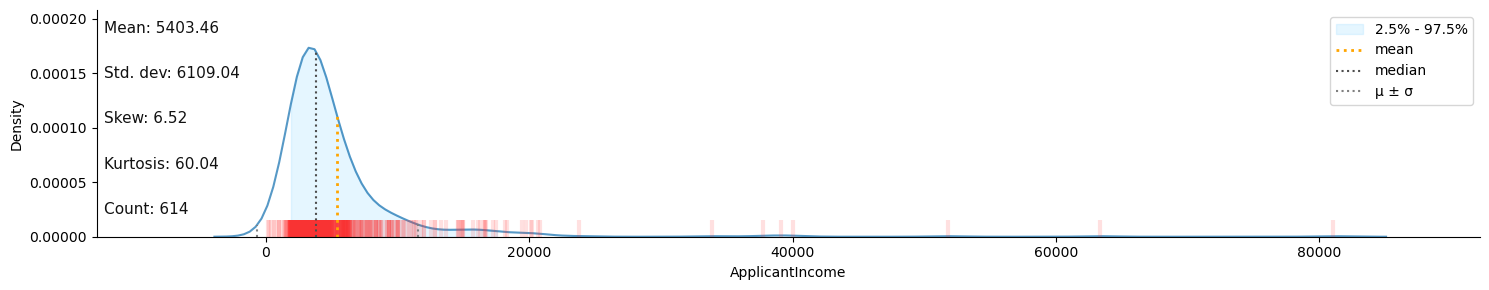

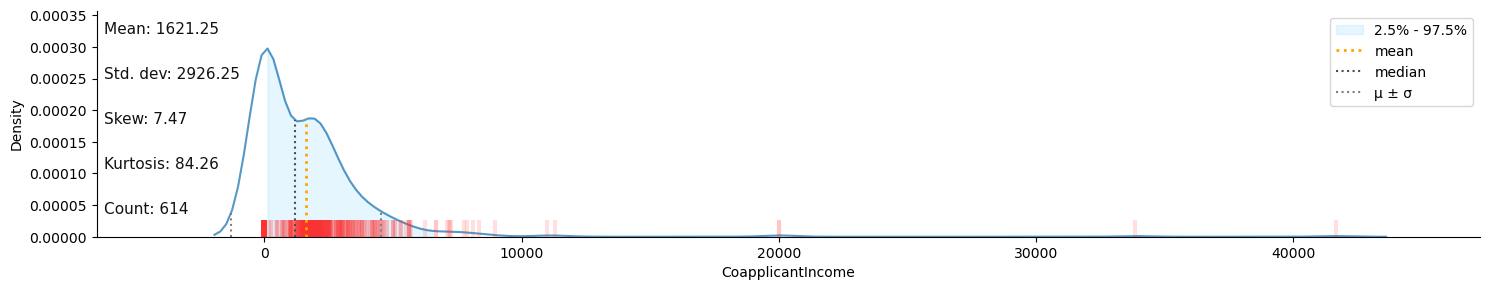

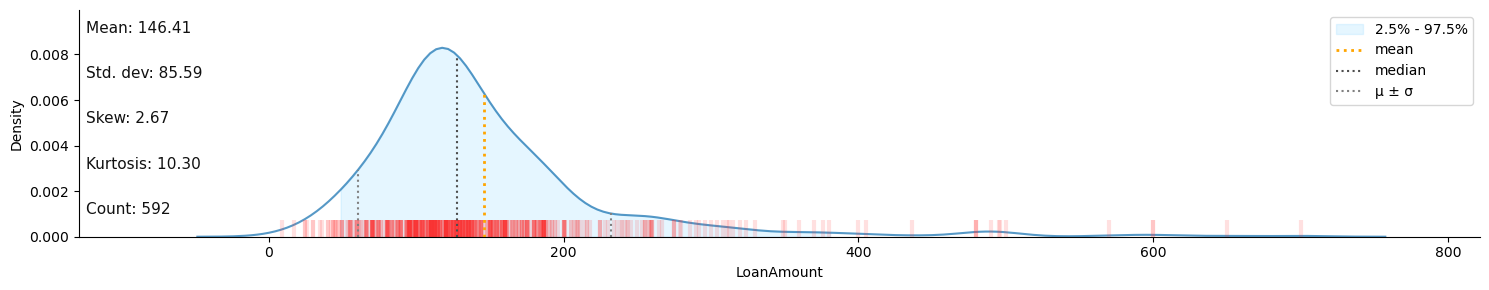

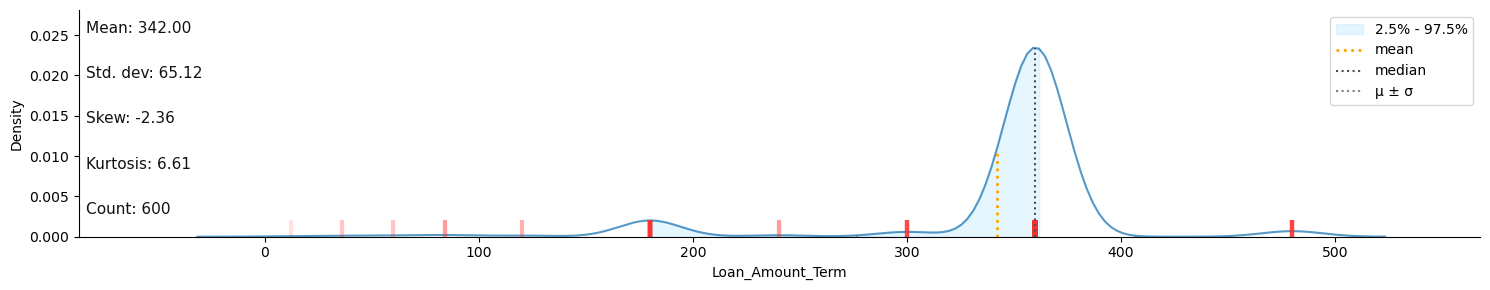

In [65]:
k.dist_plot(data)

In [67]:
data.duplicated().sum()

0

GridSpec(6, 8)

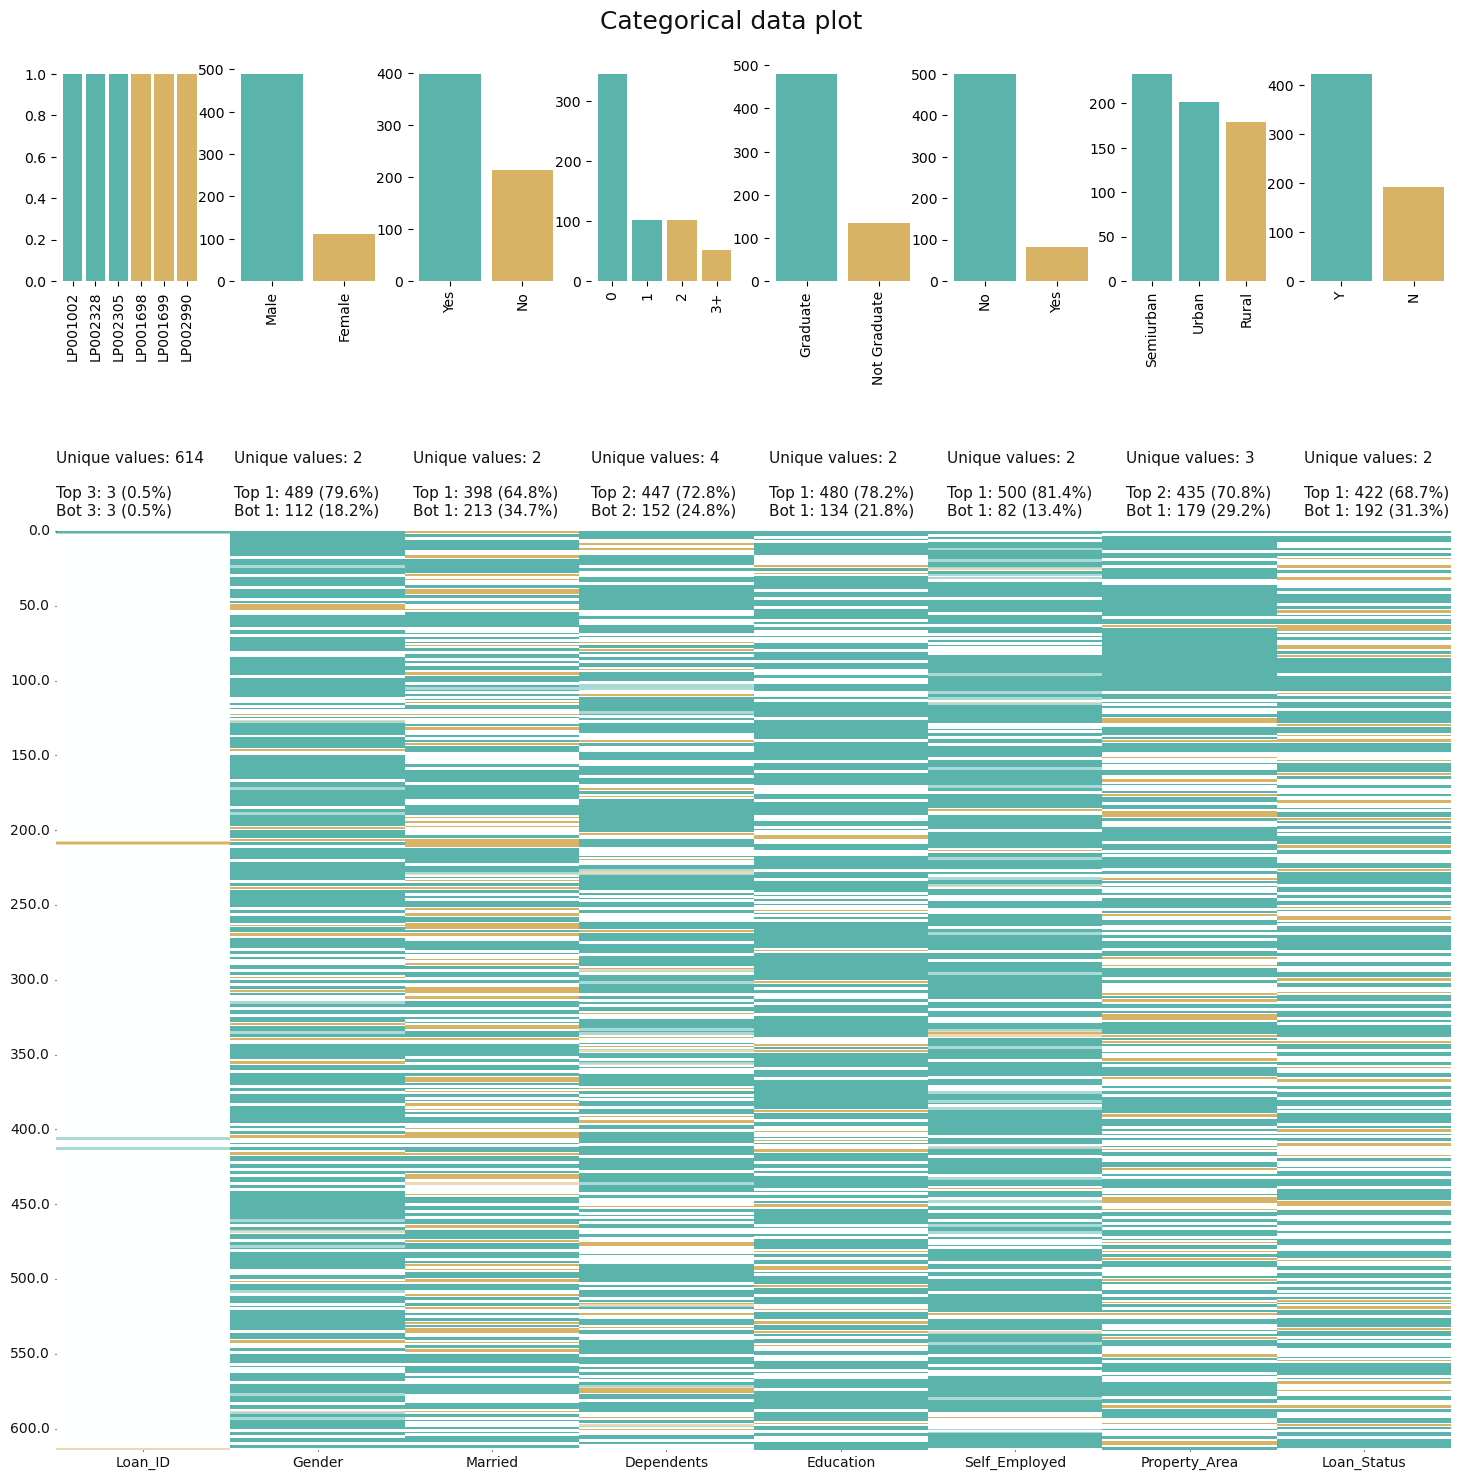

In [68]:
k.cat_plot(data)

In [4]:
le=LabelEncoder()
for i in data.columns:
    if data[i].dtype=="object":
        data[i]=le.fit_transform(data[i])
        


In [5]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [6]:
data.drop(columns="Loan_ID",inplace=True)

In [8]:
data.dropna(inplace=True)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


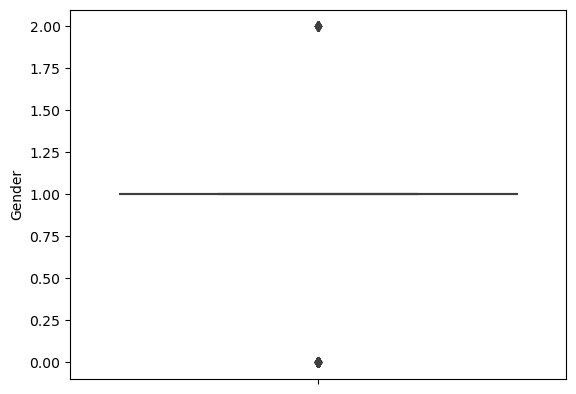

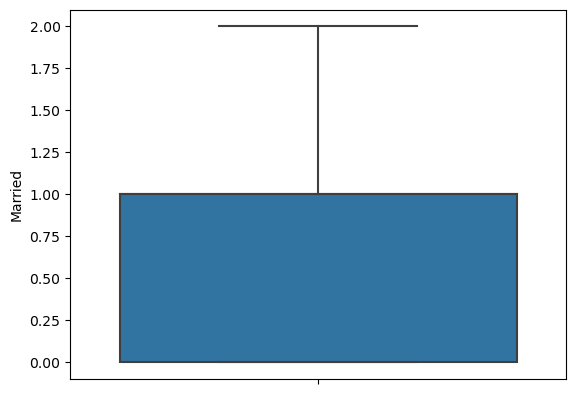

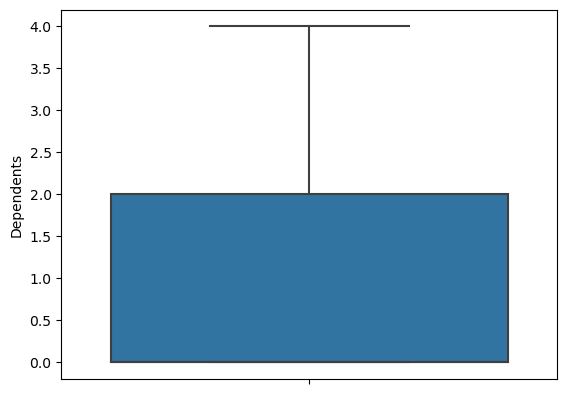

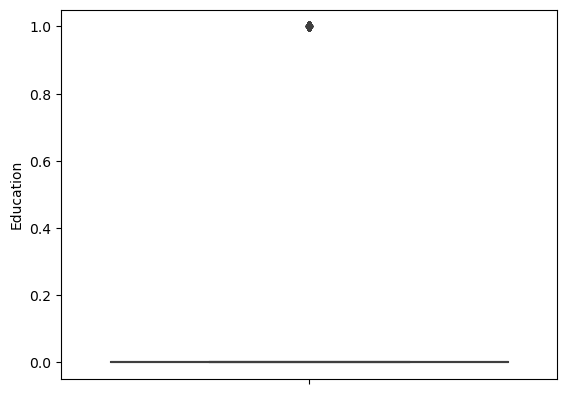

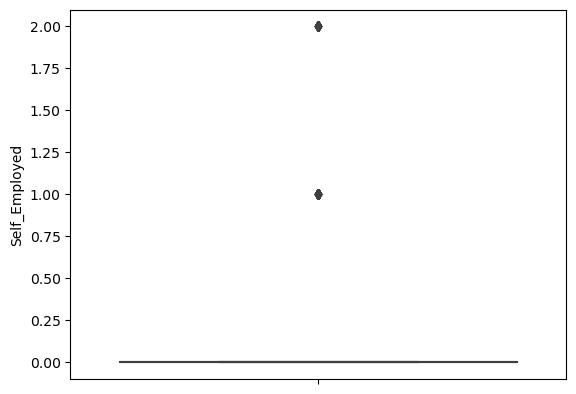

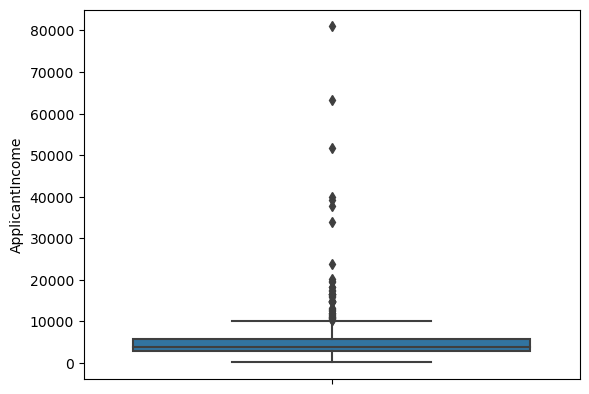

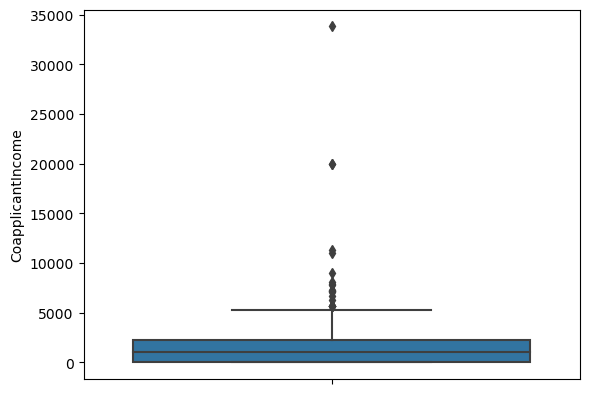

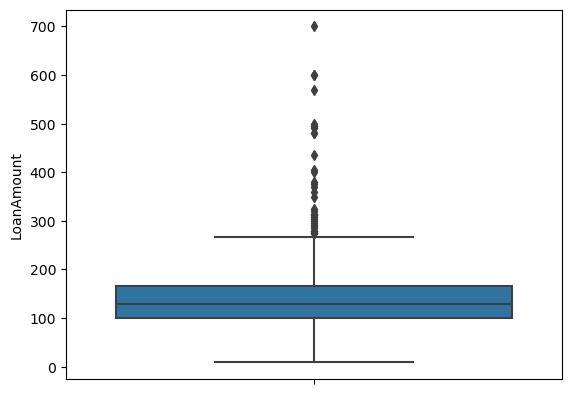

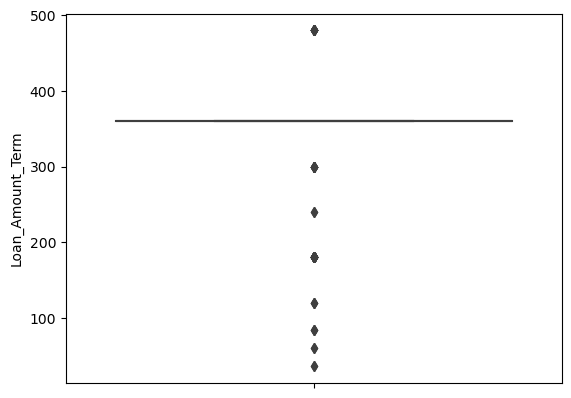

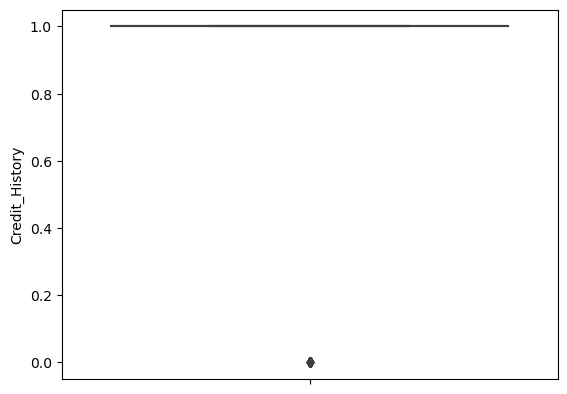

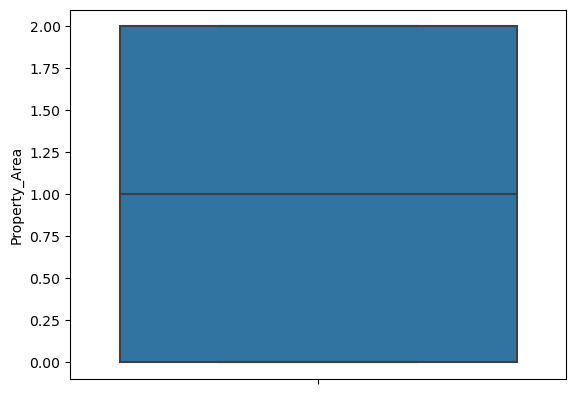

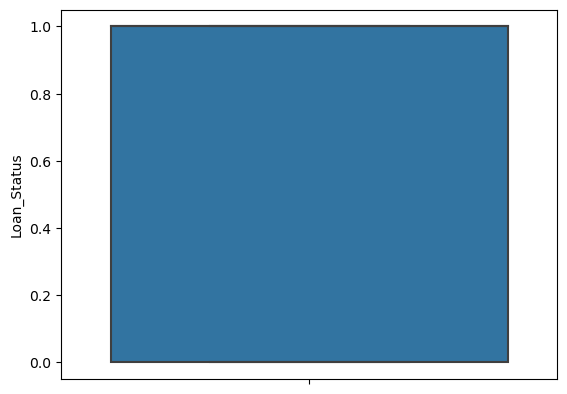

In [9]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.boxplot(y = data[column])
        plt.show()

In [10]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [11]:
for column in data.columns:
    if data[column].dtype != "object":
        UL, LL = outlier_limit(data[column])
        data[column] = np.where((data[column]>UL) | (data[column]<LL),np.nan,data[column])

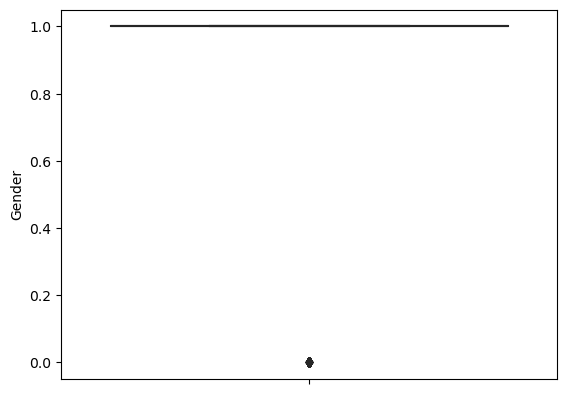

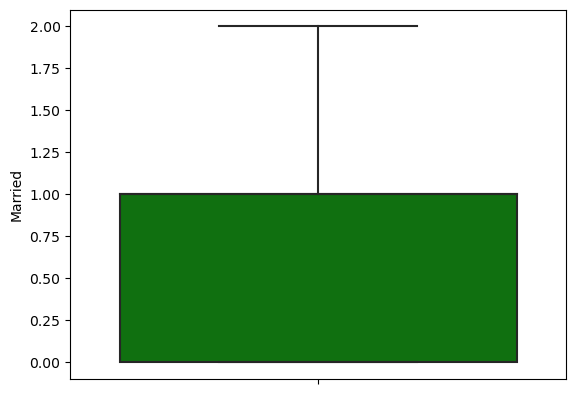

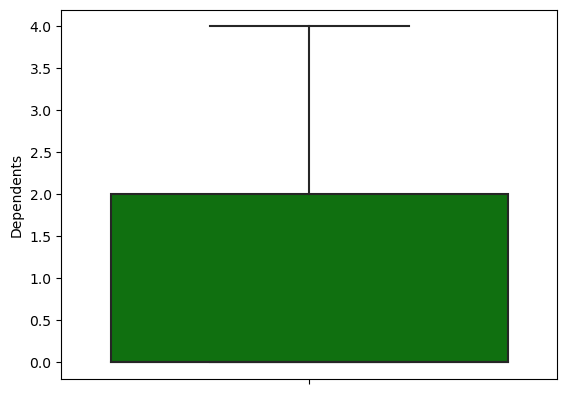

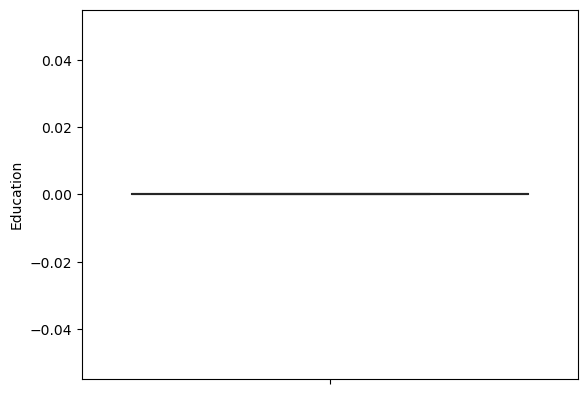

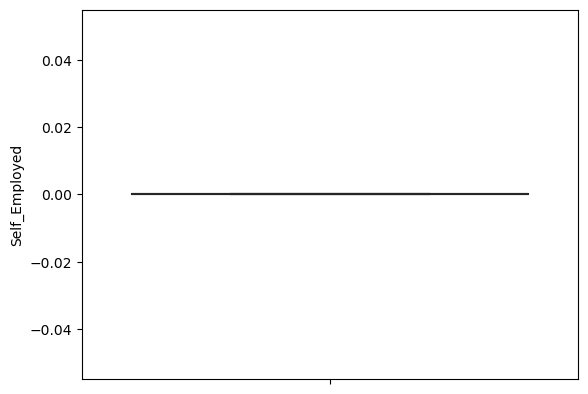

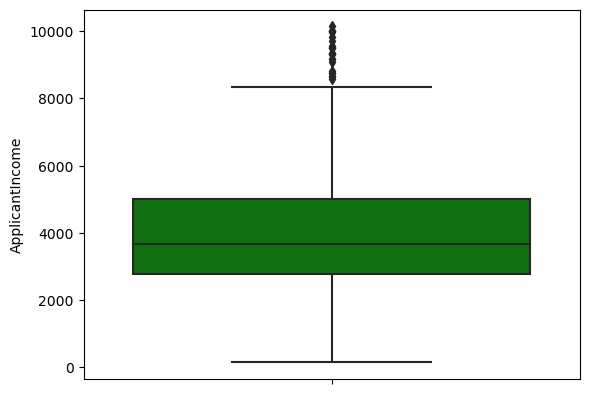

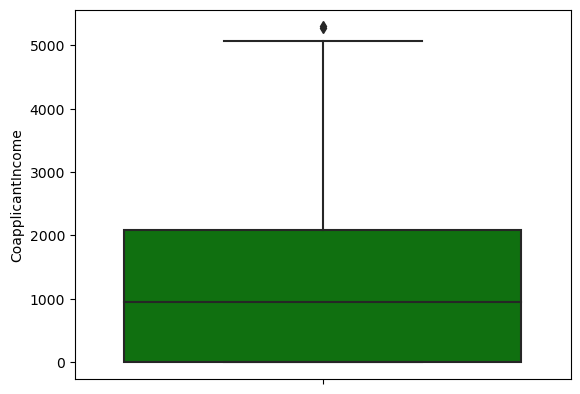

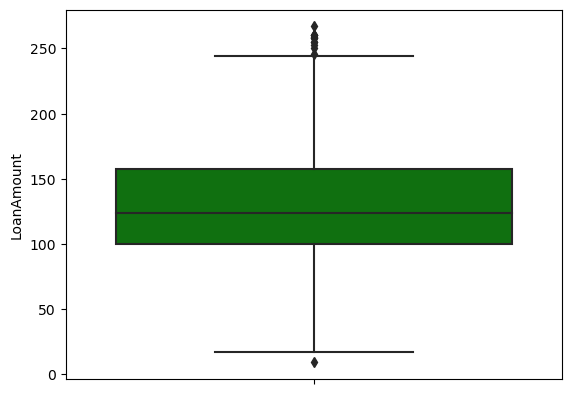

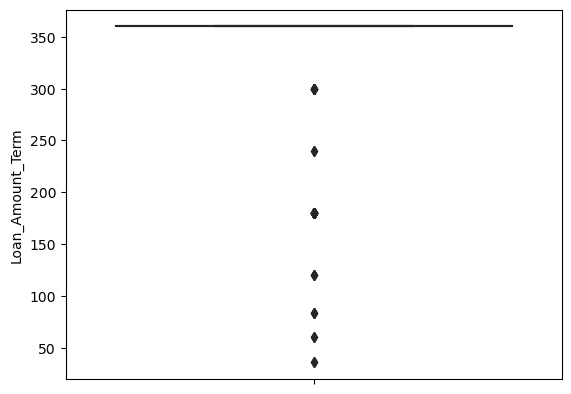

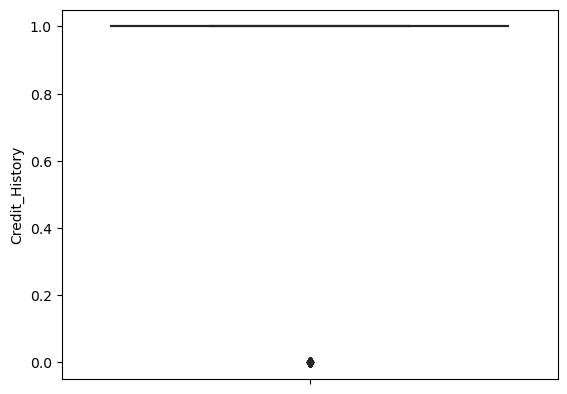

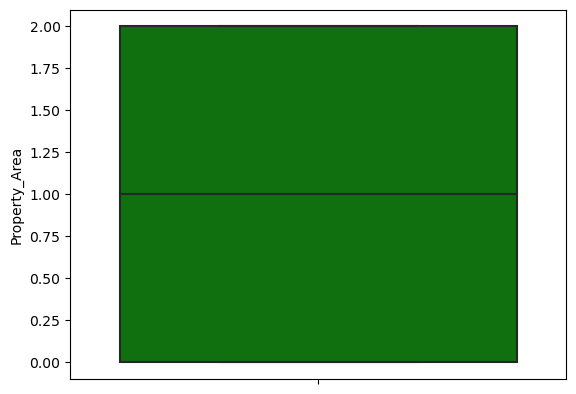

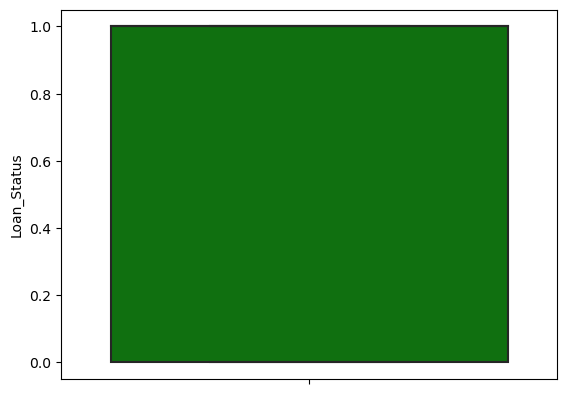

In [12]:
for column in data.columns:
    if data[column].dtype != "object":
        sns.boxplot(y = data[column], color="green")
        plt.show()

In [13]:
data.isnull().mean()*100

Gender                2.268431
Married               0.000000
Dependents            0.000000
Education            20.415879
Self_Employed        17.958412
ApplicantIncome       8.506616
CoapplicantIncome     3.969754
LoanAmount            6.616257
Loan_Amount_Term      2.646503
Credit_History        0.000000
Property_Area         0.000000
Loan_Status           0.000000
dtype: float64

In [14]:
data.dropna(inplace=True)

In [15]:
data.shape

(279, 12)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 1 to 612
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             279 non-null    float64
 1   Married            279 non-null    float64
 2   Dependents         279 non-null    float64
 3   Education          279 non-null    float64
 4   Self_Employed      279 non-null    float64
 5   ApplicantIncome    279 non-null    float64
 6   CoapplicantIncome  279 non-null    float64
 7   LoanAmount         279 non-null    float64
 8   Loan_Amount_Term   279 non-null    float64
 9   Credit_History     279 non-null    float64
 10  Property_Area      279 non-null    float64
 11  Loan_Status        279 non-null    float64
dtypes: float64(12)
memory usage: 28.3 KB


In [17]:
data.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
40,1.0,0.0,0.0,0.0,0.0,3600.0,0.0,80.0,360.0,1.0,2.0,0.0
104,1.0,2.0,4.0,0.0,0.0,3816.0,754.0,160.0,360.0,1.0,2.0,1.0
457,1.0,1.0,0.0,0.0,0.0,3708.0,2569.0,173.0,360.0,1.0,2.0,0.0
427,1.0,1.0,2.0,0.0,0.0,5935.0,0.0,133.0,360.0,1.0,1.0,1.0
350,1.0,1.0,0.0,0.0,0.0,9083.0,0.0,228.0,360.0,1.0,1.0,1.0
368,1.0,1.0,1.0,0.0,0.0,6325.0,0.0,175.0,360.0,1.0,1.0,1.0
76,1.0,0.0,0.0,0.0,0.0,3750.0,4750.0,176.0,360.0,1.0,2.0,0.0
456,1.0,1.0,0.0,0.0,0.0,4301.0,0.0,118.0,360.0,1.0,2.0,1.0
602,1.0,1.0,3.0,0.0,0.0,5703.0,0.0,128.0,360.0,1.0,2.0,1.0
539,1.0,1.0,3.0,0.0,0.0,6417.0,0.0,157.0,180.0,1.0,0.0,1.0


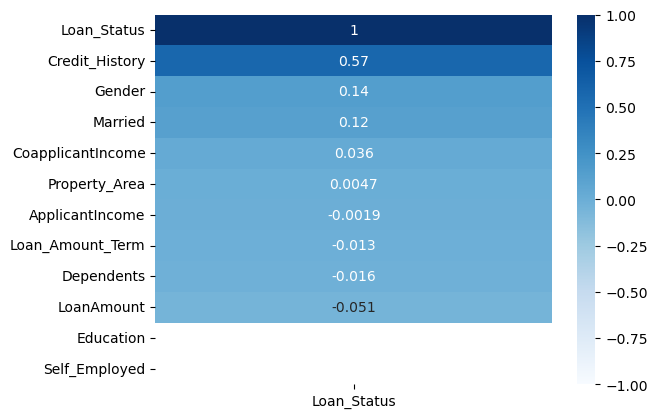

In [18]:
sns.heatmap(data.corr()[["Loan_Status"]].sort_values(by="Loan_Status", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Blues");

In [19]:
x = data[["Credit_History","Gender","Married"]].values

In [20]:
y= data[["Loan_Status"]].values

In [21]:
sc=StandardScaler()

In [22]:
x= sc.fit_transform(x)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)

In [70]:
models = {
    "LogisticRegression": LogisticRegression(),
  "Ridge":RidgeClassifier(),
    "SVC":SVC(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier()  
}

In [71]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LogisticRegression
AVERAGE RMSE:  0.38240028165112006
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.38240028165112006
****************************************************************************************************
cross validation model : SVC
AVERAGE RMSE:  0.38240028165112006
****************************************************************************************************
cross validation model : DecisionTreeClassifier
AVERAGE RMSE:  0.38240028165112006
****************************************************************************************************
cross validation model : GradientBoostingClassifier
AVERAGE RMSE:  0.38240028165112006
****************************************************************************************************
cross validation model : AdaBoostClassifier
AVERAGE RMSE:  0.38240028165112006
*************************************

In [24]:
model = LogisticRegression()

In [25]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with LogisticRegression()
Model accuracy on train is::  0.8385650224215246
Model accuracy on test is::  0.875
confusion_matrix train is::  [[ 29  33]
 [  3 158]]
confusion_matrix test is::  [[ 5  6]
 [ 1 44]]
Wrong Predictions made: 820 / 3136
************************************************************


In [26]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)

In [27]:
OUTPUT.sample(30)

,ACTUAL,PREDICTION
176,1,1
55,1,1
37,0,1
76,0,1
259,1,1
163,1,1
67,0,1
223,0,1
57,1,1
232,0,1


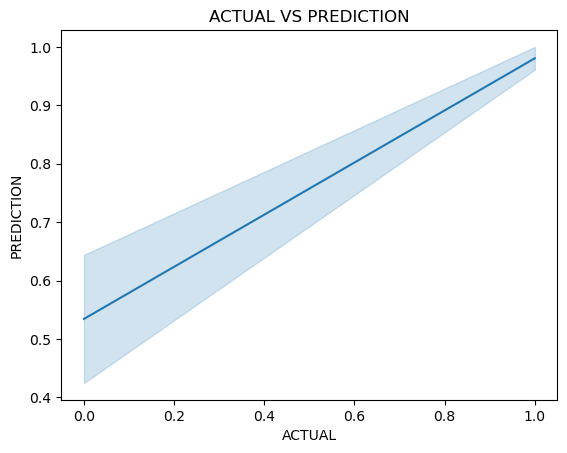

In [28]:
sns.lineplot(x='ACTUAL', y='PREDICTION', data=OUTPUT)
plt.title('ACTUAL VS PREDICTION')
plt.show()

Model used is::  LogisticRegression()


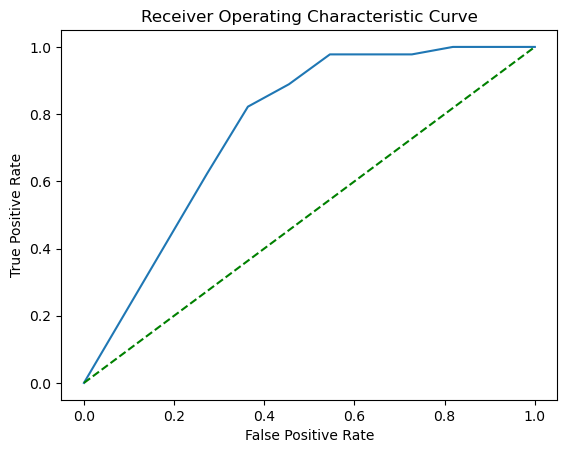

In [29]:
model.fit(x_train,y_train)
probs=model.predict_proba(x_test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,preds)
roc_auc=metrics.auc(fpr,tpr)
print("Model used is:: ", model)
sns.lineplot(x=fpr, y=tpr)
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()

In [31]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with LogisticRegression()
Model accuracy on train is::  0.8385650224215246
Model accuracy on test is::  0.875
confusion_matrix train is::  [[ 29  33]
 [  3 158]]
confusion_matrix test is::  [[ 5  6]
 [ 1 44]]
Wrong Predictions made: 820 / 3136
************************************************************
